In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The housing starts data is in SAAR = Seasonally Adjusted Annual Rate (Seasonality has been statistically removed from the housing starts data by CMHC).
That means:
“If builders kept starting homes at this month’s pace for a full year, how many homes would be started in that year (in thousands)?”
So each monthly SAAR value is annualized.
On averaging the 3 months in a quarter, we got the average annualized pace for that quarter.

**Because we’re using SAAR-based housing data, our quarterly averages are already seasonally adjusted. W can safely compare them directly with population growth, but should still mention that we’re using seasonally adjusted data to show awareness.**

In [560]:
housing_df = pd.read_csv('data/housing/housing_start_19902025.csv')
housing_df = housing_df.T
#housing_df.columns = housing_df.iloc[0] #making the 1st row as column labels
#housing_df = housing_df.drop(housing_df.index[0])
housing_df.head(5)

,Canada,Atlantic provinces,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Prairie provinces,Manitoba,Saskatchewan,Alberta,British Columbia
Jan-90,276.428,13.302,4.811,0.804,5.840,1.847,62.026,118.510,36.419,9.536,1.484,25.399,46.171
Feb-90,255.893,18.088,6.115,1.022,5.610,5.341,77.397,77.476,27.423,5.469,1.219,20.735,55.509
Mar-90,254.693,20.758,6.737,1.469,4.833,7.719,64.967,94.289,30.018,4.401,1.486,24.131,44.661
Apr-90,215.859,15.211,2.944,0.419,8.486,3.362,44.666,72.744,30.785,4.199,1.773,24.813,52.453
May-90,214.111,10.440,3.422,0.391,4.208,2.419,45.994,78.534,30.659,4.357,1.991,24.311,48.484


In [561]:
print(housing_df.columns.tolist())

['Canada', 'Atlantic provinces', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Prairie provinces', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']


In [562]:
population_df = pd.read_csv('data/housing/can_pop_19902025.csv')
population_df = population_df.T
#population_df.columns = population_df.iloc[0]
#population_df = population_df.drop(population_df.index[0])
population_df.head(10)

,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories 5,Nunavut 5
Q1 1990,"27,463,550","576,278","130,336","907,394","737,307","6,955,119","10,189,985","1,102,752","1,011,429","2,520,056","3,247,419","27,605",..,..
Q2 1990,"27,567,161","577,167","130,468","908,444","738,744","6,973,762","10,238,884","1,103,935","1,009,952","2,532,621","3,266,888","27,824",..,..
Q3 1990,"27,691,138","577,368","130,404","910,451","740,156","6,996,986","10,295,832","1,105,421","1,007,727","2,547,788","3,292,111","27,957",..,..
Q4 1990,"27,807,591","577,113","130,367","911,749","741,981","7,019,039","10,344,678","1,105,098","1,004,214","2,563,142","3,322,896","28,023",..,..
Q1 1991,"27,854,861","577,377","130,477","912,792","743,210","7,026,241","10,355,101","1,106,196","1,002,651","2,572,947","3,339,935","28,223",..,..
Q2 1991,"27,928,837","578,397","130,453","912,889","744,203","7,044,395","10,385,937","1,107,757","1,002,876","2,580,625","3,352,585","28,494",..,..
Q3 1991,"28,037,420","579,644","130,369","914,969","745,567","7,067,396","10,431,316","1,109,604","1,002,713","2,592,306","3,373,787","28,871","38,724","22,154"
Q4 1991,"28,127,327","579,549","130,360","916,896","745,886","7,080,336","10,465,562","1,109,400","1,000,942","2,604,031","3,404,049","29,142","38,854","22,320"
Q1 1992,"28,181,477","579,425","130,604","917,302","746,571","7,082,645","10,488,022","1,109,978","1,001,136","2,611,786","3,423,217","29,239","39,055","22,497"
Q2 1992,"28,269,699","579,761","130,812","917,555","747,232","7,096,705","10,528,346","1,111,050","1,002,831","2,620,771","3,443,237","29,510","39,230","22,659"


Will assume a constant average household size (AHS) = 2.5

At this moment, data is in wide format which might make handling multiple datasets difficult. Converting it to long format.

In [563]:
print(population_df.columns.tolist())

['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories 5', 'Nunavut 5']


In [564]:
provinces = {"Canada": 'can',
             'Newfoundland and Labrador': 'nl',
             'Prince Edward Island': 'pe',
             'Nova Scotia': 'ns',
             'New Brunswick': 'nb',
             'Quebec': 'qc',
             'Ontario': 'on',
             'Manitoba': 'mb',
             'Saskatchewan': 'sk',
             'Alberta': 'ab', 
             'British Columbia': 'bc'
             }

In [565]:
'''
population.columns = (population.columns
                      .str.strip()
                      .str.replace(r'\s*\d$', "", regex=True)
)
population.columns
'''

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/h4/8_8xkn4579zbrdb79s7zrtl00000gp/T/ipykernel_79415/3526754401.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''


'\npopulation.columns = (population.columns\n                      .str.strip()\n                      .str.replace(r\'\\s*\\d$\', "", regex=True)\n)\npopulation.columns\n'

In [566]:
population = population_df.drop(
    columns=[c for c in population_df.columns if any(x in c for x in ["Yukon","Northwest","Nunavut","Atlantic","Prairie"])],
    errors="ignore"
)

In [567]:
population = population.rename(columns=provinces)
population.index

Index(['Q1 1990', 'Q2 1990', 'Q3 1990', 'Q4 1990', 'Q1 1991', 'Q2 1991',
       'Q3 1991', 'Q4 1991', 'Q1 1992', 'Q2 1992',
       ...
       'Q2 2023', 'Q3 2023', 'Q4 2023', 'Q1 2024', 'Q2 2024', 'Q3 2024',
       'Q4 2024', 'Q1 2025', 'Q2 2025', 'Q3 2025'],
      dtype='object', length=143)

# For housing

In [568]:
housing = housing_df.drop(
    columns=[c for c in housing_df.columns if any(x in c for x in ["Yukon","Northwest","Nunavut","Atlantic","Prairie"])],
    errors="ignore"
)
housing = housing.rename(columns=provinces)
housing

,can,nl,pe,ns,nb,qc,on,mb,sk,ab,bc
Jan-90,276.428,4.811,0.804,5.840,1.847,62.026,118.510,9.536,1.484,25.399,46.171
Feb-90,255.893,6.115,1.022,5.610,5.341,77.397,77.476,5.469,1.219,20.735,55.509
Mar-90,254.693,6.737,1.469,4.833,7.719,64.967,94.289,4.401,1.486,24.131,44.661
Apr-90,215.859,2.944,0.419,8.486,3.362,44.666,72.744,4.199,1.773,24.813,52.453
May-90,214.111,3.422,0.391,4.208,2.419,45.994,78.534,4.357,1.991,24.311,48.484
...,...,...,...,...,...,...,...,...,...,...,...
Apr-25,282.679,2.100,2.232,13.665,4.089,57.322,70.410,6.728,7.800,63.583,54.750
May-25,283.294,1.599,0.594,9.640,8.638,67.485,72.711,9.007,5.663,68.939,39.018
Jun-25,283.914,1.677,0.743,9.314,9.365,58.830,62.624,5.728,4.893,63.565,67.175
Jul-25,293.537,1.720,2.904,17.662,9.785,63.773,77.637,6.070,5.143,51.843,57.000


In [569]:
housing.index = pd.to_datetime(housing.index, format='%b-%y')
housing = housing.sort_index()
housing

,can,nl,pe,ns,nb,qc,on,mb,sk,ab,bc
1990-01-01,276.428,4.811,0.804,5.840,1.847,62.026,118.510,9.536,1.484,25.399,46.171
1990-02-01,255.893,6.115,1.022,5.610,5.341,77.397,77.476,5.469,1.219,20.735,55.509
1990-03-01,254.693,6.737,1.469,4.833,7.719,64.967,94.289,4.401,1.486,24.131,44.661
1990-04-01,215.859,2.944,0.419,8.486,3.362,44.666,72.744,4.199,1.773,24.813,52.453
1990-05-01,214.111,3.422,0.391,4.208,2.419,45.994,78.534,4.357,1.991,24.311,48.484
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,282.679,2.100,2.232,13.665,4.089,57.322,70.410,6.728,7.800,63.583,54.750
2025-05-01,283.294,1.599,0.594,9.640,8.638,67.485,72.711,9.007,5.663,68.939,39.018
2025-06-01,283.914,1.677,0.743,9.314,9.365,58.830,62.624,5.728,4.893,63.565,67.175
2025-07-01,293.537,1.720,2.904,17.662,9.785,63.773,77.637,6.070,5.143,51.843,57.000


In [570]:
housing.index.is_monotonic_increasing

True

Converting the monthly data to quarterly, trying out with 'qc' only at first. 

As the data are expressed in seasonally adjusted annual rates (SAAR), the quarterly value is taken as the mean of the three monthly SAAR observations, reflecting the average annualized pace of housing starts during that quarter.

In [571]:
qc_series = housing.qc
type(qc_series.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [572]:
qc_quarter = qc_series.resample('Q-DEC').mean()
qc_quarter.index

/var/folders/h4/8_8xkn4579zbrdb79s7zrtl00000gp/T/ipykernel_79415/3292532574.py:1: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  qc_quarter = qc_series.resample('Q-DEC').mean()


DatetimeIndex(['1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31', '1992-06-30',
               ...
               '2023-06-30', '2023-09-30', '2023-12-31', '2024-03-31',
               '2024-06-30', '2024-09-30', '2024-12-31', '2025-03-31',
               '2025-06-30', '2025-09-30'],
              dtype='datetime64[ns]', length=143, freq='QE-DEC')

1990-03-31 -> 68.13 → average of Jan + Feb + Mar 1990 SAARs

1990-06-30 -> 48.775333 → average of Apr + May + Jun 1990 SAARs

Now converting to periodindex as i want the data in Q1-year format.

In [573]:
qc_quarter.index = qc_quarter.index.to_period('Q')


In [574]:
qc_quarter.index

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2',
             ...
             '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3',
             '2024Q4', '2025Q1', '2025Q2', '2025Q3'],
            dtype='period[Q-DEC]', length=143)

In [575]:
housing_quarter = housing.resample('Q-DEC').mean()

/var/folders/h4/8_8xkn4579zbrdb79s7zrtl00000gp/T/ipykernel_79415/2281222673.py:1: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  housing_quarter = housing.resample('Q-DEC').mean()


In [576]:
housing_quarter.index = housing_quarter.index.to_period('Q')

In [577]:
#housing_quarter.index.name = 'quarter'

In [578]:
#housing_quarter = housing_quarter.reset_index()

In [579]:
housing_long = housing_quarter.stack().reset_index()
housing_long.columns = ['quarter', 'province', 'starts_saar']

In [580]:
housing_long = housing_long.set_index('quarter').reset_index()

In [581]:
housing_long

,quarter,province,starts_saar
0,1990Q1,can,262.338000
1,1990Q1,nl,5.887667
2,1990Q1,pe,1.098333
3,1990Q1,ns,5.427667
4,1990Q1,nb,4.969000
...,...,...,...
1568,2025Q3,on,68.557500
1569,2025Q3,mb,7.775500
1570,2025Q3,sk,5.009000
1571,2025Q3,ab,49.756500


## Doing the same for population table

In [582]:
population

,can,nl,pe,ns,nb,qc,on,mb,sk,ab,bc
Q1 1990,"27,463,550","576,278","130,336","907,394","737,307","6,955,119","10,189,985","1,102,752","1,011,429","2,520,056","3,247,419"
Q2 1990,"27,567,161","577,167","130,468","908,444","738,744","6,973,762","10,238,884","1,103,935","1,009,952","2,532,621","3,266,888"
Q3 1990,"27,691,138","577,368","130,404","910,451","740,156","6,996,986","10,295,832","1,105,421","1,007,727","2,547,788","3,292,111"
Q4 1990,"27,807,591","577,113","130,367","911,749","741,981","7,019,039","10,344,678","1,105,098","1,004,214","2,563,142","3,322,896"
Q1 1991,"27,854,861","577,377","130,477","912,792","743,210","7,026,241","10,355,101","1,106,196","1,002,651","2,572,947","3,339,935"
...,...,...,...,...,...,...,...,...,...,...,...
Q3 2024,"41,262,329","546,869","179,709","1,082,769","858,293","8,995,474","16,144,797","1,492,144","1,247,868","4,909,030","5,671,114"
Q4 2024,"41,494,132","548,402","180,877","1,088,273","863,841","9,038,268","16,228,152","1,500,464","1,256,983","4,957,075","5,696,852"
Q1 2025,"41,574,517","548,842","180,686","1,089,187","865,945","9,043,463","16,255,550","1,505,644","1,261,524","4,988,181","5,699,989"
Q2 2025,"41,604,555","549,456","181,289","1,091,037","867,014","9,041,123","16,256,538","1,508,031","1,264,537","5,010,078","5,699,690"


In [583]:
population.index = population.index.str.replace(r'Q(\d)\s+(\d{4})', r'\2Q\1', regex=True)

In [584]:
population.index = pd.PeriodIndex(population.index, freq='Q')


In [585]:
population.index

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2',
             ...
             '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3',
             '2024Q4', '2025Q1', '2025Q2', '2025Q3'],
            dtype='period[Q-DEC]', length=143)

In [586]:
population_long = population.stack().reset_index()
population_long.columns = ['quarter', 'province', 'population']

In [587]:
population.head()

,can,nl,pe,ns,nb,qc,on,mb,sk,ab,bc
1990Q1,"27,463,550","576,278","130,336","907,394","737,307","6,955,119","10,189,985","1,102,752","1,011,429","2,520,056","3,247,419"
1990Q2,"27,567,161","577,167","130,468","908,444","738,744","6,973,762","10,238,884","1,103,935","1,009,952","2,532,621","3,266,888"
1990Q3,"27,691,138","577,368","130,404","910,451","740,156","6,996,986","10,295,832","1,105,421","1,007,727","2,547,788","3,292,111"
1990Q4,"27,807,591","577,113","130,367","911,749","741,981","7,019,039","10,344,678","1,105,098","1,004,214","2,563,142","3,322,896"
1991Q1,"27,854,861","577,377","130,477","912,792","743,210","7,026,241","10,355,101","1,106,196","1,002,651","2,572,947","3,339,935"


In [588]:
population.index

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2',
             ...
             '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3',
             '2024Q4', '2025Q1', '2025Q2', '2025Q3'],
            dtype='period[Q-DEC]', length=143)

In [589]:
population_long

,quarter,province,population
0,1990Q1,can,"27,463,550"
1,1990Q1,nl,"576,278"
2,1990Q1,pe,"130,336"
3,1990Q1,ns,"907,394"
4,1990Q1,nb,"737,307"
...,...,...,...
1568,2025Q3,on,"16,258,260"
1569,2025Q3,mb,"1,509,702"
1570,2025Q3,sk,"1,266,959"
1571,2025Q3,ab,"5,029,346"


In [590]:
population_long['population'] = population_long['population'].str.replace(',','').astype(float)

In [591]:
population_long

,quarter,province,population
0,1990Q1,can,27463550.0
1,1990Q1,nl,576278.0
2,1990Q1,pe,130336.0
3,1990Q1,ns,907394.0
4,1990Q1,nb,737307.0
...,...,...,...
1568,2025Q3,on,16258260.0
1569,2025Q3,mb,1509702.0
1570,2025Q3,sk,1266959.0
1571,2025Q3,ab,5029346.0


Cleaned Data to work on: population_long, housing_long

In [592]:
print(population_long.isnull().sum())
print(housing_long.isnull().sum())

quarter       0
province      0
population    0
dtype: int64
quarter        0
province       0
starts_saar    0
dtype: int64


The population had missing values for some of the data for the territories which we are not using.

In [593]:
df_final = pd.merge(population_long, housing_long, on=['quarter', 'province'], how='inner')
df = df_final.copy()

In [594]:
df

,quarter,province,population,starts_saar
0,1990Q1,can,27463550.0,262.338000
1,1990Q1,nl,576278.0,5.887667
2,1990Q1,pe,130336.0,1.098333
3,1990Q1,ns,907394.0,5.427667
4,1990Q1,nb,737307.0,4.969000
...,...,...,...,...
1568,2025Q3,on,16258260.0,68.557500
1569,2025Q3,mb,1509702.0,7.775500
1570,2025Q3,sk,1266959.0,5.009000
1571,2025Q3,ab,5029346.0,49.756500


At this moment, my population data is quarterly, but the starts_saar gives the average annualized rate for a quarter. So, we have to deannualize the SAAR numbers to get the actual number of houses started in that quarter (x1000), which is done by converting that to quarterly (by dividing by 4) to match that of the population growth and then having our forecast on a quarterly basis.

**Note on Converting SAAR to Quarterly Units**

CMHC reports *Seasonally Adjusted Annual Rates (SAAR)* — values expressed as **annualized rates**, i.e., “if the current pace continued for a full year, how many homes would be started.”

Since my dataset is quarterly, each `starts_saar` value represents the **average annualized pace during that quarter**.
To estimate the **actual number of homes started within the quarter**, I divide the SAAR value by 4 (since there are four quarters in a year):


$\text{starts\_units\_q} = \frac{\text{starts\_saar}}{4}$

This converts the data from “thousands of homes per year” → “thousands of homes per quarter.”
The time index (e.g., `1990Q1`, `1990Q2`, …) remains unchanged and only the unit of measurement changes.


In [595]:
df['starts_saar_q'] = df['starts_saar']/4
df['dwelling_starts'] = df['starts_saar_q'] * 1000

In [596]:
df

,quarter,province,population,starts_saar,starts_saar_q,dwelling_starts
0,1990Q1,can,27463550.0,262.338000,65.584500,65584.500000
1,1990Q1,nl,576278.0,5.887667,1.471917,1471.916667
2,1990Q1,pe,130336.0,1.098333,0.274583,274.583333
3,1990Q1,ns,907394.0,5.427667,1.356917,1356.916667
4,1990Q1,nb,737307.0,4.969000,1.242250,1242.250000
...,...,...,...,...,...,...
1568,2025Q3,on,16258260.0,68.557500,17.139375,17139.375000
1569,2025Q3,mb,1509702.0,7.775500,1.943875,1943.875000
1570,2025Q3,sk,1266959.0,5.009000,1.252250,1252.250000
1571,2025Q3,ab,5029346.0,49.756500,12.439125,12439.125000


Housing Adequacy Index (HAI):
HAI = starts/needed, if <1: inadequate, >1: surplus

In [636]:
df['pop_change_q'] = df.groupby('province')['population'].diff()
df['needed_units_q'] = df['pop_change_q']/2.5 #considering an average household size = 2.5
df['hai'] = df['dwelling_starts']/df['needed_units_q']
df.loc[df["needed_units_q"].abs() < 10, "hai"] = np.nan #cases where quarterly population change ≈ 0 were set to NaN, 
#since extremely small denominators produce unrealistically large ratios that do not reflect real housing dynamics.

In [637]:
df

,quarter,province,population,starts_saar,starts_saar_q,dwelling_starts,pop_change_q,needed_units_q,hai
0,1990Q1,can,27463550.0,262.338000,65.584500,65584.500000,NaN,NaN,NaN
1,1990Q1,nl,576278.0,5.887667,1.471917,1471.916667,NaN,NaN,NaN
2,1990Q1,pe,130336.0,1.098333,0.274583,274.583333,NaN,NaN,NaN
3,1990Q1,ns,907394.0,5.427667,1.356917,1356.916667,NaN,NaN,NaN
4,1990Q1,nb,737307.0,4.969000,1.242250,1242.250000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1568,2025Q3,on,16258260.0,68.557500,17.139375,17139.375000,1722.0,688.8,24.882949
1569,2025Q3,mb,1509702.0,7.775500,1.943875,1943.875000,1671.0,668.4,2.908251
1570,2025Q3,sk,1266959.0,5.009000,1.252250,1252.250000,2422.0,968.8,1.292578
1571,2025Q3,ab,5029346.0,49.756500,12.439125,12439.125000,19268.0,7707.2,1.613962


In [638]:
#Sanity check
df.query("province=='sk'")[["quarter","population","hai"]]


,quarter,population,hai
8,1990Q1,1011429.0,NaN
19,1990Q2,1009952.0,-0.780580
30,1990Q3,1007727.0,-0.423127
41,1990Q4,1004214.0,-0.151580
52,1991Q1,1002651.0,-0.359752
...,...,...,...
1526,2024Q3,1247868.0,0.385115
1537,2024Q4,1256983.0,0.314774
1548,2025Q1,1261524.0,0.839802
1559,2025Q2,1264537.0,1.269222


| **Column** | **Meaning** | **Units** |
|:------------|:-------------|:-----------|
| `quarter` | Time (PeriodIndex, quarterly) | Q-DEC |
| `province` | Province code | — |
| `population` | Total population | persons |
| `starts_saar` | CMHC seasonally adjusted annual rate | 1000s dwellings/year |
| `starts_saar_q` | Approx. actual housing starts | 1000s dwellings/quarter |
| `dwelling_starts` | Approximate number of dwellings started per quarter (converted from SAAR, which is in thousands of dwellings per year) | dwellings/quarter |
| `pop_change_q` | Quarterly population change | persons |
| `needed_units_q` | Required homes = Δpop / 2.5 | dwellings (not ×1000) |
| `hai` | Housing Adequacy Index = starts_saar_q / needed_units_q | unitless ratio |

*Table: Description of variables in the housing adequacy dataset.*
"""))


In [639]:
#Quick checks with the dataset before proceeding

df[df["pop_change_q"].isna()].quarter.unique() #to check that NaN values are only in 1990Q1

<PeriodArray>
['1990Q1']
Length: 1, dtype: period[Q-DEC]

In [640]:
df.query("pop_change_q < -100000") #checking for wild negative growth

,quarter,province,population,starts_saar,starts_saar_q,dwelling_starts,pop_change_q,needed_units_q,hai


HAI values become infinite when quarterly population change (dpop_q) is zero or negative, since the denominator (needed_units_q) becomes 0 or < 0.
These cases are excluded (HAI = NaN) as they don’t represent meaningful housing adequacy ratios. Thus, NaN values now appear in the dataset.

In [641]:
df.loc[df["needed_units_q"] == 0, "hai"] = np.nan #defining HAI only if the population is not changing

In [642]:
df.groupby('province')['hai'].mean().sort_values()

province
nl     0.177645
sk     0.505780
bc     0.546676
can    0.744219
pe     1.210127
ab     1.275507
ns     1.500149
mb     1.599952
on     1.908097
qc     3.012454
nb     4.028840
Name: hai, dtype: float64

In [643]:
df.query("province=='sk'")[["quarter","pop_change_q","population", 'hai']].tail(30)

,quarter,pop_change_q,population,hai
1251,2018Q2,1164.0,1153530.0,1.740586
1262,2018Q3,2680.0,1156210.0,0.819807
1273,2018Q4,3438.0,1159648.0,0.686082
1284,2019Q1,1881.0,1161529.0,0.663322
1295,2019Q2,258.0,1161787.0,5.771156
1306,2019Q3,2436.0,1164223.0,0.730877
1317,2019Q4,3048.0,1167271.0,0.520697
1328,2020Q1,2155.0,1169426.0,0.732889
1339,2020Q2,-388.0,1169038.0,-3.744094
1350,2020Q3,-1652.0,1167386.0,-1.648255


<Axes: xlabel='quarter'>

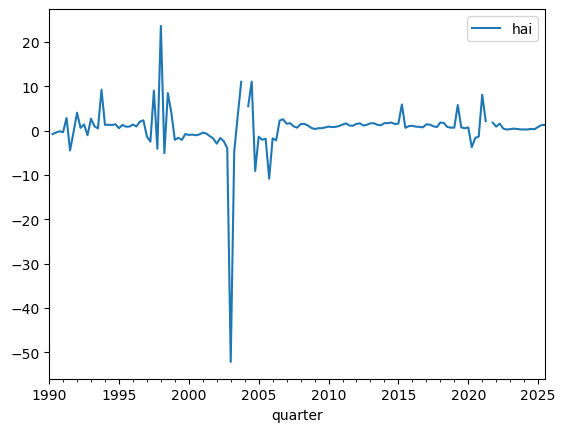

In [644]:
df.query("province=='sk'").set_index("quarter")[["hai"]].plot()

In [645]:
df.isnull().sum()

quarter             0
province            0
population          0
starts_saar         0
starts_saar_q       0
dwelling_starts     0
pop_change_q       11
needed_units_q     11
hai                38
dtype: int64

In [646]:
df.to_csv("data/housing_adequacy_dataset.csv", index=False)

| **Column** | **Role in Modeling** | **Why it Matters** |
|:------------|:---------------------|:--------------------|
| `quarter` | **Time index** | Used to split train/test chronologically; can extract features like year or quarter of year. |
| `province` | **Grouping key** | Each province can have its own model; enables province-wise analysis and comparisons. |
| `population` | **Level indicator** | Captures structural scale — larger populations imply higher housing demand baseline. |
| `pop_change_q` | **Primary driver** | Reflects short-term demographic shifts; key predictor of housing demand. |
| `needed_units_q` | **Derived demand feature** | Converts population change into estimated housing need (Δpop / 2.5). |
| `starts_saar_q` | **Target variable** | Quarterly housing starts to be forecasted; main outcome variable. |
| `starts_saar` | **Reference variable** | Original CMHC SAAR values (annualized); helps check scaling and realism. |
| `hai` | **Diagnostic variable** | Evaluates adequacy of supply vs. demand; used for post-model analysis and validation. |
| `starts_saar_q_lag1`, `starts_saar_q_lag4` | **Temporal features** | Capture persistence and quarterly/annual seasonality in housing starts. |


In [647]:
df[["dwelling_starts", "needed_units_q", "hai"]].describe().T


,count,mean,std,min,25%,50%,75%,max
dwelling_starts,1573.0,8850.127252,14140.696050,55.833333,710.583333,1621.666667,10799.250000,72671.25000
needed_units_q,1562.0,7253.680666,14442.098676,-1691.600000,137.800000,1531.000000,7567.600000,167453.60000
hai,1535.0,1.504185,10.932435,-123.080188,0.672026,1.182914,2.075488,194.71688


In [648]:
df.loc[df["needed_units_q"].abs() < 10, ["quarter", "province", "needed_units_q", "hai"]]


,quarter,province,needed_units_q,hai
57,1991Q2,pe,-9.6,NaN
79,1991Q4,pe,-3.6,NaN
112,1992Q3,pe,6.0,NaN
179,1994Q1,ns,0.4,NaN
321,1997Q2,pe,-1.6,NaN
442,2000Q1,pe,7.2,NaN
486,2001Q1,pe,-9.2,NaN
530,2002Q1,pe,-7.2,NaN
552,2002Q3,pe,-4.4,NaN
562,2002Q4,nl,-9.6,NaN
